In [142]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from pandas import DataFrame

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

## Подготовим данные

In [143]:
#Загружаем данные из csv файла ./data/data.csv в текущей директории. Разделитель чисел указываем ','
df_all_engines = pd.read_csv("./data/data.csv", decimal=",")
# Заменяем имя столбца "№" на 'Number'
df_all_engines.rename({"№": 'Number'}, axis=1, inplace=True)
# Выводим 10 ерхних записей чтобы убедиться что данные загрузились корректно
df_all_engines.head(10)

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
0,1,0.000648,-30,8,30,1543.3,9.8644,0.82,0.21679,0.39073,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15
1,2,0.000564,-30,8,30,1561.3,9.9798,0.82,0.21428,0.39530,...,0.03801,90.601,2.4128,370.14,72.063,928.49,6.8396,941.81,45,2.15
2,3,0.000479,-30,8,30,1575.7,10.0720,0.82,0.21232,0.39895,...,0.02820,89.601,2.4125,368.59,72.069,924.78,6.8709,941.93,45,2.15
3,4,0.000648,-20,8,30,1759.3,11.2460,0.92,0.21335,0.39702,...,0.05511,89.001,2.4141,368.88,72.312,927.99,7.3033,997.50,45,2.15
4,5,0.000564,-20,8,30,1771.8,11.3250,0.92,0.21185,0.39984,...,0.04087,93.201,2.4137,367.18,72.284,923.54,7.3549,1000.40,45,2.15
5,6,0.000479,-20,8,30,1786.1,11.4170,0.92,0.21015,0.40307,...,0.03086,95.201,2.3879,364.60,71.548,917.50,7.3780,1007.00,45,2.15
6,7,0.000648,-10,8,30,1967.3,12.5750,1.02,0.21153,0.40043,...,0.05491,90.601,2.3897,367.12,71.722,925.40,7.7625,1060.80,45,2.15
7,8,0.000564,-10,8,30,1978.4,12.6460,1.02,0.21036,0.40268,...,0.04044,97.201,2.3888,366.15,71.651,922.39,7.8372,1069.50,45,2.15
8,9,0.000479,-10,8,30,1983.2,12.6770,1.02,0.20984,0.40366,...,0.02980,101.600,2.3880,365.19,71.599,919.63,7.9174,1078.40,45,2.15
9,10,0.000648,-26,12,30,1551.8,9.9191,0.82,0.21559,0.39290,...,0.05537,88.201,2.2012,356.34,72.372,921.35,6.8232,928.87,30,2.15


Проверяем какой тип данных имеют столбцы. int64 - целые числа

In [144]:
df_all_engines.x4.head()

0    30
1    30
2    30
3    30
4    30
Name: x4, dtype: int64

In [145]:
df_all_engines.Number.head()

0    1
1    2
2    3
3    4
4    5
Name: Number, dtype: int64

Для столбца Ne - тип float64 - числа с плавающей запятой

In [146]:
df_all_engines.Ne.head()

0    1543.3
1    1561.3
2    1575.7
3    1759.3
4    1771.8
Name: Ne, dtype: float64

Все данные загрузились с корректными типами.
Установим общий стиль графиков:

In [147]:
plt.style.use('fivethirtyeight')

## Посмотрим как менялась мощьность в ходе экспериментов для всех 83 случаев

Text(0, 0.5, 'Мощьность кВт')

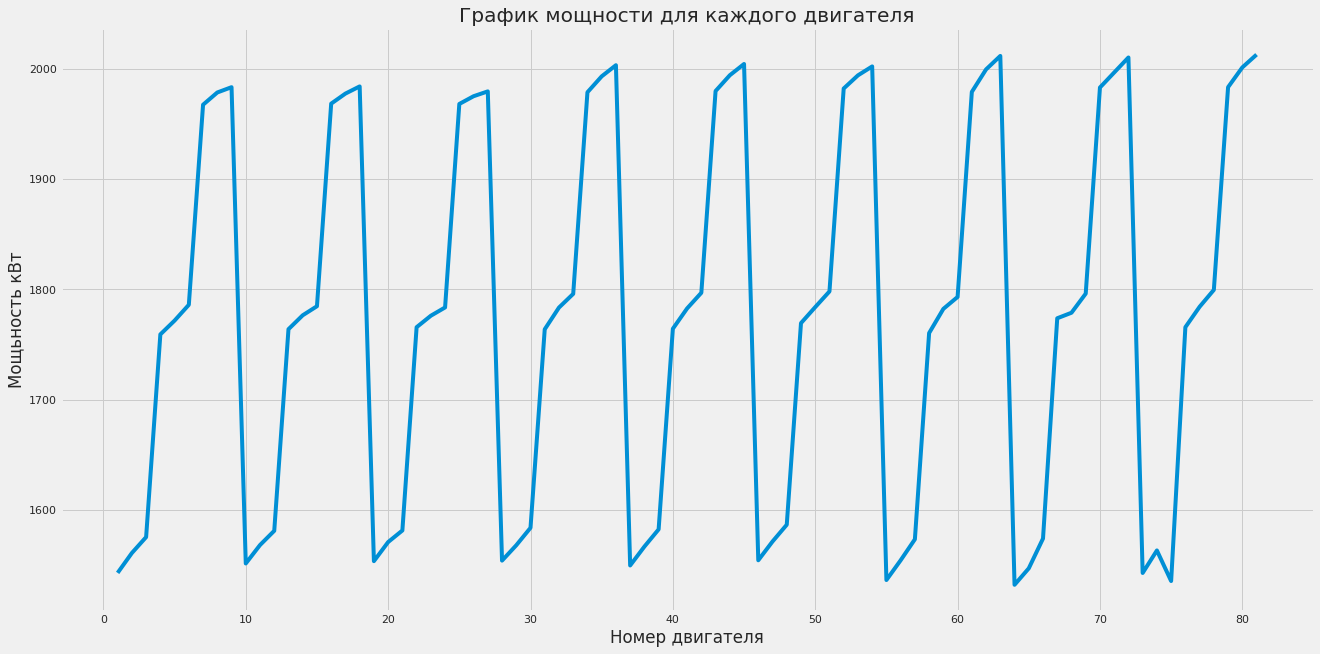

In [148]:
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Number, df_all_engines.Ne)
plt.title("График мощности для каждого двигателя")
plt.xlabel("Номер двигателя")
plt.ylabel("Мощьность кВт")

## Теперь проследим изменение КПД

Для начала вставим корректное значение. В 12 ячейке было значение 399807, очевидно это ошибка, поправим ее

In [149]:
df_all_engines["кпд е"][12] = 0.399807


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'КПД')

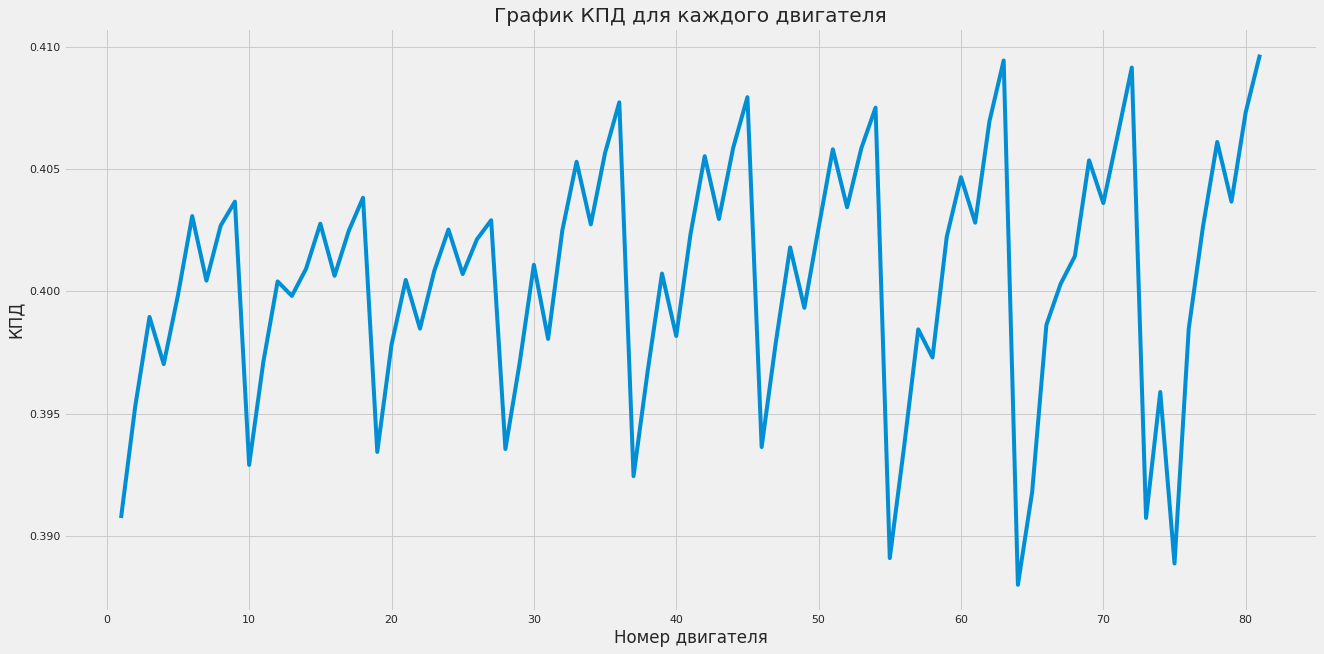

In [150]:
plt.figure(figsize=(20, 10))
plt.plot(df_all_engines.Number, df_all_engines["кпд е"])
plt.title("График КПД для каждого двигателя")
plt.xlabel("Номер двигателя")
plt.ylabel("КПД")

### Создадим отдельные датасеты сгруппированные по парметру x2 - угол опережения подачи топлива

In [256]:
#Сгруппируем все данные по столбцу х2 чтобы увидеть возможные значения данного параметра.
df_all_engines.groupby("x2").first()

,Number,X1,X3,x4,Ne,Pe,gц,be,кпд е,Pi,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
x2,,,,,,,,,,,,,,,,,,,,,
-30,1,0.000648,8,30,1543.3,9.8644,0.82,0.21679,0.390730,11.597,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15
-26,10,0.000648,12,30,1551.8,9.9191,0.82,0.21559,0.392900,11.662,...,0.05537,88.201,2.2012,356.34,72.372,921.35,6.8232,928.87,30,2.15
-22,19,0.000648,16,30,1553.9,9.9326,0.82,0.21530,0.393430,11.647,...,0.06198,90.001,1.9865,346.25,69.134,912.39,6.6979,944.65,15,2.15
-20,4,0.000648,8,30,1759.3,11.2460,0.92,0.21335,0.397020,12.961,...,0.05511,89.001,2.4141,368.88,72.312,927.99,7.3033,997.50,45,2.15
-16,13,0.000648,12,30,1764.0,11.2750,0.92,0.21279,0.399807,12.989,...,0.05661,88.601,2.2024,356.92,72.499,923.96,7.3119,991.96,30,2.15
-12,22,0.000648,16,30,1765.8,11.2870,0.92,0.21258,0.398470,12.961,...,0.06268,91.201,1.9892,346.85,69.311,915.09,7.1905,1009.90,15,2.15
-10,7,0.000648,8,30,1967.3,12.5750,1.02,0.21153,0.400430,14.269,...,0.05491,90.601,2.3897,367.12,71.722,925.40,7.7625,1060.80,45,2.15
-6,16,0.000648,12,30,1968.3,12.5810,1.02,0.21143,0.400630,14.288,...,0.05394,89.201,2.2030,357.70,72.585,926.84,7.7936,1054.20,30,2.15
-2,25,0.000648,16,30,1968.0,12.5830,1.02,0.21140,0.400700,14.253,...,0.05974,92.001,1.9907,347.63,69.436,918.12,7.6752,1074.00,15,2.15


Видим, что возможные значения для х2 это: -30, -26, ... -2. Создадим датасеты для каждого из данных значений. 

In [151]:
# Для всех двигателей с пораметром x2 = -30 создадим датасет
df_x2_30 = df_all_engines[df_all_engines.x2 == -30]
# Для всех остальных возможных значений х2 создадим датасеты по аналогии:
df_x2_26 = df_all_engines[df_all_engines.x2 == -26]
df_x2_20 = df_all_engines[df_all_engines.x2 == -20]
df_x2_16 = df_all_engines[df_all_engines.x2 == -16]
df_x2_12 = df_all_engines[df_all_engines.x2 == -12]
df_x2_10 = df_all_engines[df_all_engines.x2 == -10]
df_x2_6 = df_all_engines[df_all_engines.x2 == -6]
df_x2_2 = df_all_engines[df_all_engines.x2 == -2]
# Проверим что датасет корректно сформировался. Выведем последние 5 значений для группы х2 = -30
df_x2_30.tail()

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
28,29,0.000564,-30,8,15,1568.3,10.0240,0.82,0.21333,0.39706,...,0.03488,84.0,2.6611,368.09,79.561,924.29,7.1197,885.58,45,2.39
29,30,0.000479,-30,8,15,1584.1,10.1260,0.82,0.21119,0.40108,...,0.02562,83.6,2.6607,366.76,79.545,920.91,7.1476,885.73,45,2.39
54,55,0.000648,-30,8,0,1536.8,9.8229,0.82,0.21770,0.38909,...,0.04099,79.8,2.9346,373.33,87.557,935.51,7.4097,849.04,45,2.63
55,56,0.000564,-30,8,0,1554.7,9.9373,0.82,0.21520,0.39362,...,0.02983,80.4,2.9342,371.78,87.562,931.81,7.4247,847.14,45,2.63
56,57,0.000479,-30,8,0,1573.7,10.0590,0.82,0.21259,0.39844,...,0.02201,80.2,2.9338,369.97,87.564,927.42,7.4518,846.04,45,2.63


Попробуем выявить зависимость КПД от расхода топлива для сформированных выше датасетов. Чтобы не перегружать график возьмем граничные значения -30 и -2 и значение из середины -12.

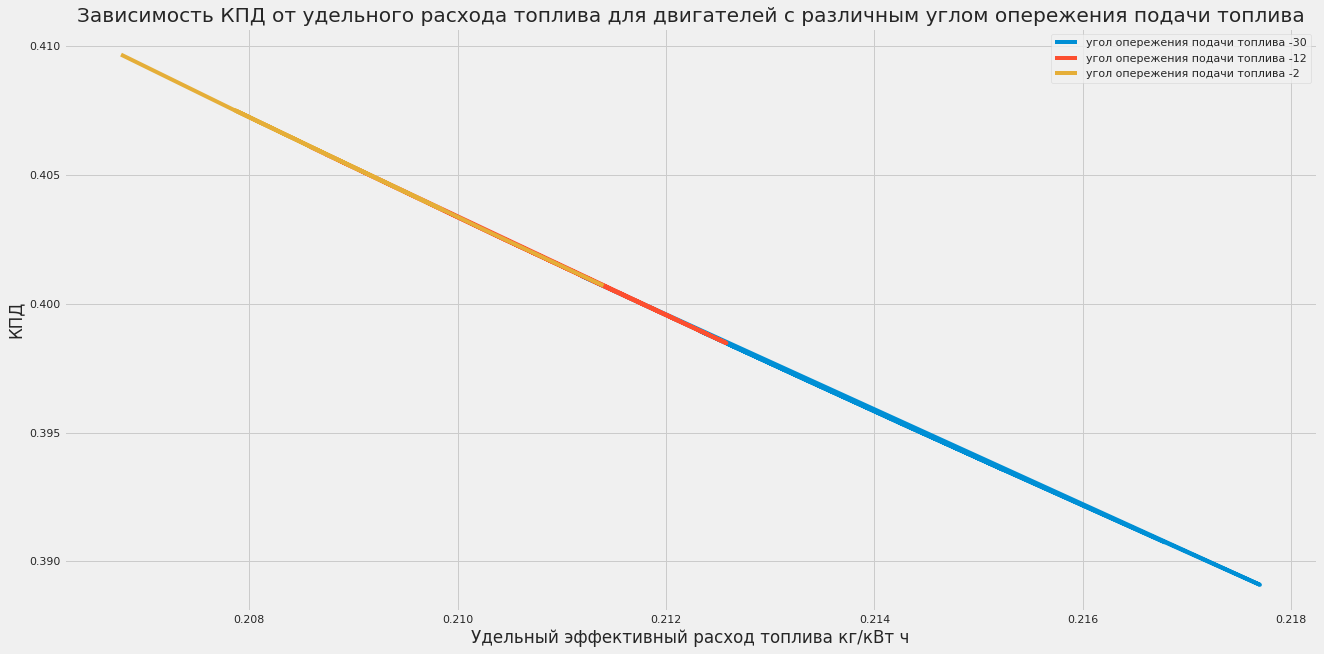

In [257]:
plt.figure(figsize=(20, 10))
plt.plot(df_x2_30["be"], df_x2_30["кпд е"], label='угол опережения подачи топлива -30')
plt.plot(df_x2_12["be"], df_x2_12["кпд е"], label='угол опережения подачи топлива -12')
plt.plot(df_x2_2["be"], df_x2_2["кпд е"], label='угол опережения подачи топлива -2')
plt.title("Зависимость КПД от удельного расхода топлива для двигателей с различным углом опережения подачи топлива")
plt.xlabel("Удельный эффективный расход топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Видим что двигатели группы с уголом опережения подачи топлава = -2 имеют наименьший расход топлива и большее КПД

Построим график зависимости мощьности от расхода топлива для групп.

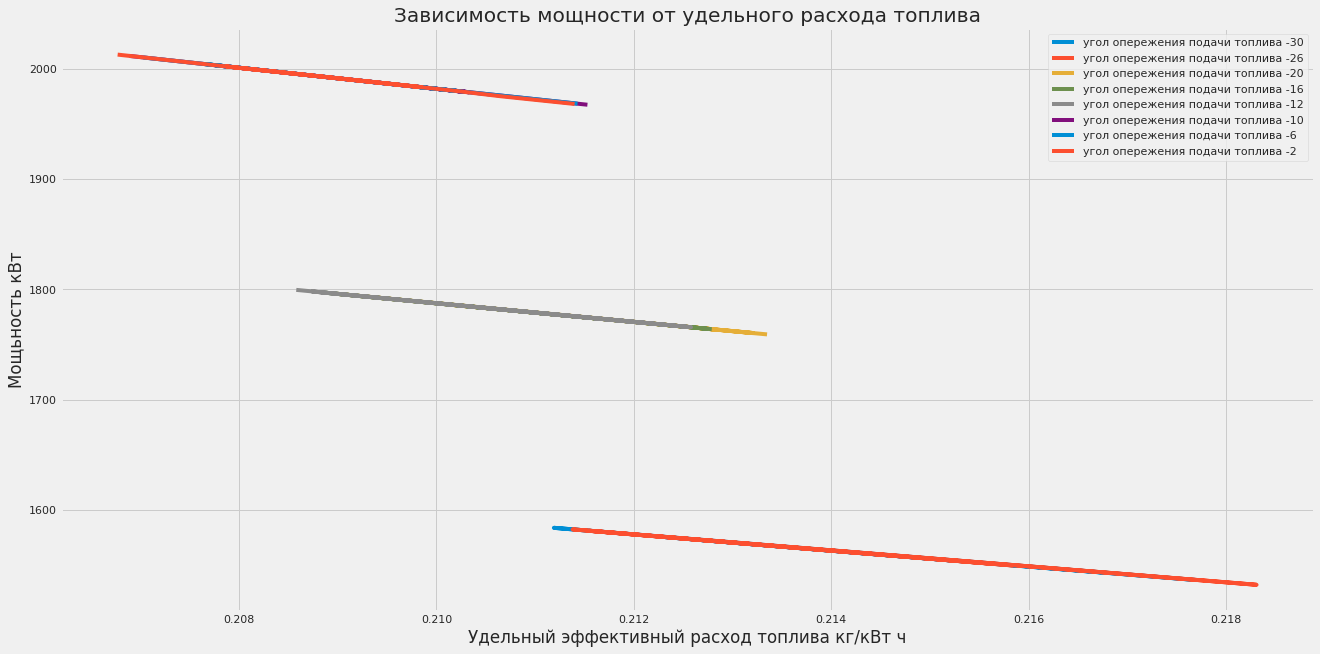

In [281]:
plt.figure(figsize=(20, 10))
plt.plot(df_x2_30["be"], df_x2_30.Ne, label='угол опережения подачи топлива -30')
plt.plot(df_x2_26["be"], df_x2_26.Ne, label='угол опережения подачи топлива -26')
plt.plot(df_x2_20["be"], df_x2_20.Ne, label='угол опережения подачи топлива -20')
plt.plot(df_x2_16["be"], df_x2_16.Ne, label='угол опережения подачи топлива -16')
plt.plot(df_x2_12["be"], df_x2_12.Ne, label='угол опережения подачи топлива -12')
plt.plot(df_x2_10["be"], df_x2_10.Ne, label='угол опережения подачи топлива -10')
plt.plot(df_x2_6["be"], df_x2_6.Ne, label='угол опережения подачи топлива -6')
plt.plot(df_x2_2["be"], df_x2_2.Ne, label='угол опережения подачи топлива -2')
plt.title("Зависимость мощности от удельного расхода топлива")
plt.xlabel("Удельный эффективный расход топлива кг/кВт ч")
plt.ylabel("Мощьность кВт")
plt.legend()

Видим, что двигатели разбились на 3 группы. Для двигателей с параметрами уголами опережения подачи топлава -10, -6 и -2 наблюдапется наибольшая мощьность при меньшем расходе топлива.

### Создадим отдельные датасеты для параметра x1 - цикловая подача топлива

Сгруппируем данные по параметру х1 чтобы увидеть его возможные значения

In [154]:
df_all_engines.groupby("X1").first()

,Number,x2,X3,x4,Ne,Pe,gц,be,кпд е,Pi,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
X1,,,,,,,,,,,,,,,,,,,,,
0.000479,3,-30,8,30,1575.7,10.0720,0.82,0.21232,0.39895,11.778,...,0.02820,89.601,2.4125,368.59,72.069,924.78,6.8709,941.93,45,2.15
0.000564,2,-30,8,30,1561.3,9.9798,0.82,0.21428,0.39530,11.700,...,0.03801,90.601,2.4128,370.14,72.063,928.49,6.8396,941.81,45,2.15
0.000648,1,-30,8,30,1543.3,9.8644,0.82,0.21679,0.39073,11.597,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15


Возможные значения х1: 0.000479, 0.0005636, 0.0006481

In [260]:
# # Для всех остальных возможных значений х2 создадим датасеты по аналогии:
df_x1_1 = df_all_engines[df_all_engines.X1 == df_all_engines.X1.min()]
df_x1_2 = df_all_engines[df_all_engines.X1 == 0.0005636]
df_x1_3 = df_all_engines[df_all_engines.X1 == 0.0006481]
# # Проверим что датасет корректно сформировался. Выведем последние 5 значений для группы х2 = -30
df_x1_1.head()

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
2,3,0.000479,-30,8,30,1575.7,10.072,0.82,0.21232,0.39895,...,0.02820,89.601,2.4125,368.59,72.069,924.78,6.8709,941.93,45,2.15
5,6,0.000479,-20,8,30,1786.1,11.417,0.92,0.21015,0.40307,...,0.03086,95.201,2.3879,364.60,71.548,917.50,7.3780,1007.00,45,2.15
8,9,0.000479,-10,8,30,1983.2,12.677,1.02,0.20984,0.40366,...,0.02980,101.600,2.3880,365.19,71.599,919.63,7.9174,1078.40,45,2.15
11,12,0.000479,-26,12,30,1581.4,10.108,0.82,0.21155,0.40040,...,0.02924,89.201,2.2006,355.03,72.299,917.27,6.8808,932.92,30,2.15
14,15,0.000479,-16,12,30,1784.8,11.408,0.92,0.21031,0.40276,...,0.03010,94.601,2.2011,355.61,72.362,919.39,7.4080,1002.00,30,2.15


Построим зависимость КПД от расхода топлива для сформированных выше датасетов.

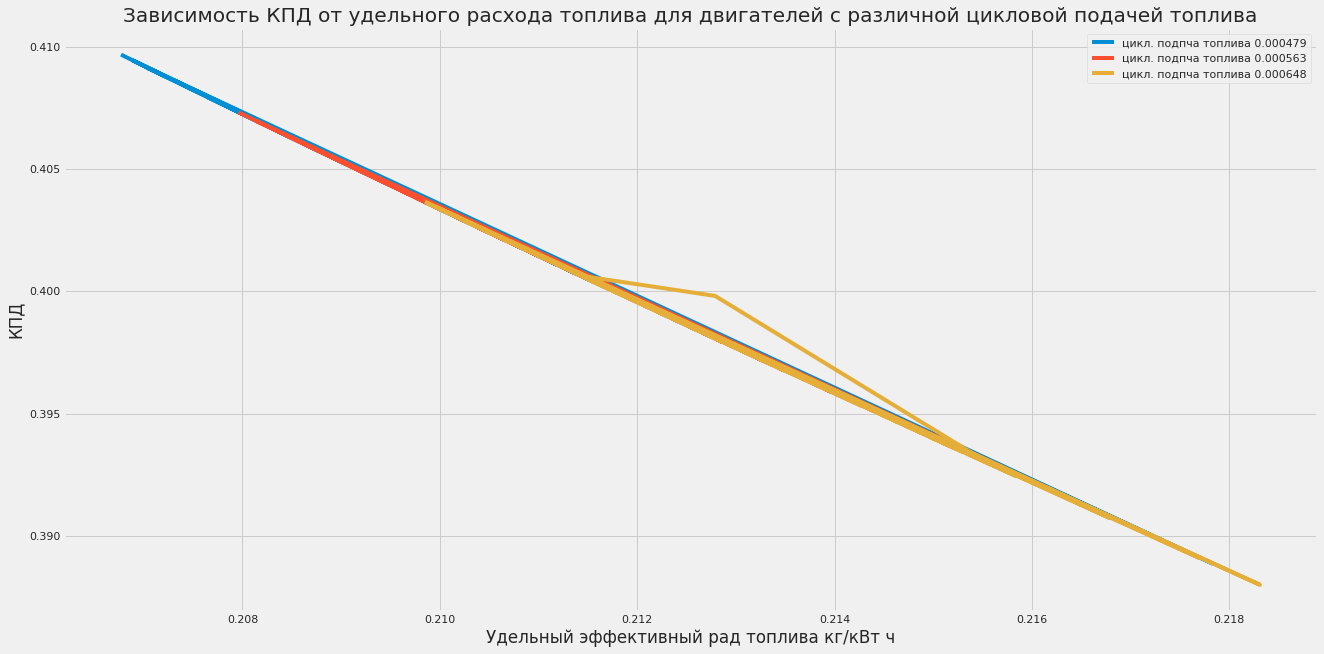

In [285]:
plt.figure(figsize=(20, 10))
plt.plot(df_x1_1["be"], df_x1_1["кпд е"], label='цикл. подпча топлива 0.000479')
plt.plot(df_x1_2["be"], df_x1_2["кпд е"], label='цикл. подпча топлива 0.000563')
plt.plot(df_x1_3["be"], df_x1_3["кпд е"], label='цикл. подпча топлива 0.000648')
plt.title("Зависимость КПД от удельного расхода топлива для двигателей с различной цикловой подачей топлива")
plt.xlabel("Удельный эффективный рад топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Видим что группа двигателей с цикловой подачей топлива 0.000479 наиболее эфективна  в данном сравнении

Построим график зависимости мощности от расхода топлива для групп.

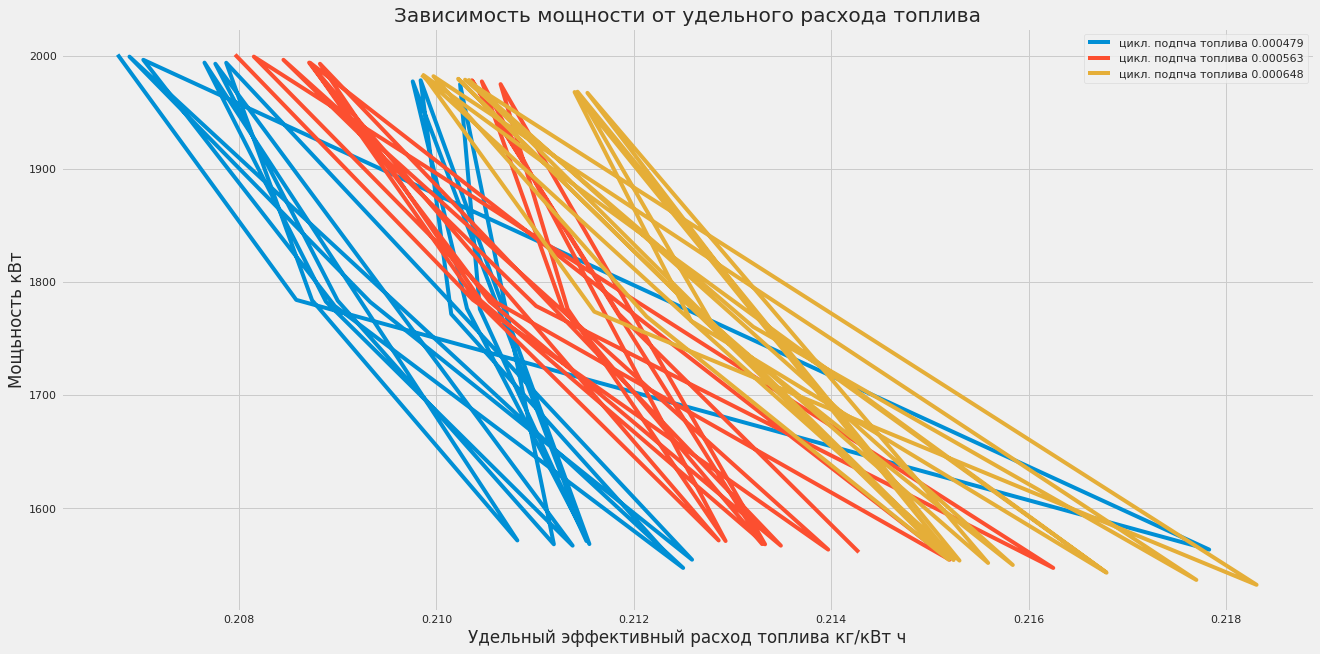

In [280]:
plt.figure(figsize=(20, 10))
plt.plot(df_x1_1["be"], df_x1_2.Ne, label='цикл. подпча топлива 0.000479')
plt.plot(df_x1_2["be"], df_x1_2.Ne, label='цикл. подпча топлива 0.000563')
plt.plot(df_x1_3["be"], df_x1_3.Ne, label='цикл. подпча топлива 0.000648')
plt.title("Зависимость мощности от удельного расхода топлива")
plt.xlabel("Удельный эффективный расход топлива кг/кВт ч")
plt.ylabel("Мощьность кВт")
plt.legend()

Видим что двигатели с любой подачей топлива могут достигать максимальной мощьности около 2кВт, но наиболее экономичны при этом двигатели с параметром 0.000479.

### Создадим отдельные датасеты для параметра x3 - угол закрытия впускного клапана

In [229]:
# Сгруппируем все данные по столбцу х3 чтобы увидеть возможные значения данного параметра.
df_all_engines.groupby("X3").first()

,Number,X1,x2,x4,Ne,Pe,gц,be,кпд е,Pi,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
X3,,,,,,,,,,,,,,,,,,,,,
8,1,0.000648,-30,30,1543.3,9.8644,0.82,0.21679,0.39073,11.597,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15
12,10,0.000648,-26,30,1551.8,9.9191,0.82,0.21559,0.39290,11.662,...,0.05537,88.201,2.2012,356.34,72.372,921.35,6.8232,928.87,30,2.15
16,19,0.000648,-22,30,1553.9,9.9326,0.82,0.21530,0.39343,11.647,...,0.06198,90.001,1.9865,346.25,69.134,912.39,6.6979,944.65,15,2.15


Видим, что возможные значения угла закрытия впускного клапана 8, 12, 16

Создадим отдельные датасеты для параметра x3 - угол закрытия впускного клапана

In [269]:
df_x3_8 = df_all_engines[df_all_engines.X3 == 8]
df_x3_12 = df_all_engines[df_all_engines.X3 == 12]
df_x3_16 = df_all_engines[df_all_engines.X3 == 16]
# Проверим что датасет корректно сформировался. Выведем последние 5 значений для группы х3 = 8
df_x3_8.tail()

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
58,59,0.000564,-20,8,0,1782.4,11.393,0.92,0.21060,0.40222,...,0.03141,82.200,2.9337,369.74,87.721,928.55,7.9383,989.12,45,2.63
59,60,0.000479,-20,8,0,1793.2,11.462,0.92,0.20933,0.40466,...,0.02278,82.400,2.9332,369.39,87.655,927.13,7.9714,900.92,45,2.63
60,61,0.000648,-10,8,0,1978.9,12.649,1.02,0.21029,0.40280,...,0.04185,81.200,2.9346,370.84,87.874,932.66,8.4068,950.28,45,2.63
61,62,0.000564,-10,8,0,1999.3,12.780,1.02,0.20815,0.40694,...,0.03041,85.201,2.9334,369.82,87.794,929.61,8.4535,953.62,45,2.63
62,63,0.000479,-10,8,0,2011.5,12.858,1.02,0.20689,0.40943,...,0.02225,87.001,2.9325,369.04,87.737,927.33,8.5096,958.25,45,2.63


Построим зависимость КПД от расхода топлива для сформированных выше датасетов.

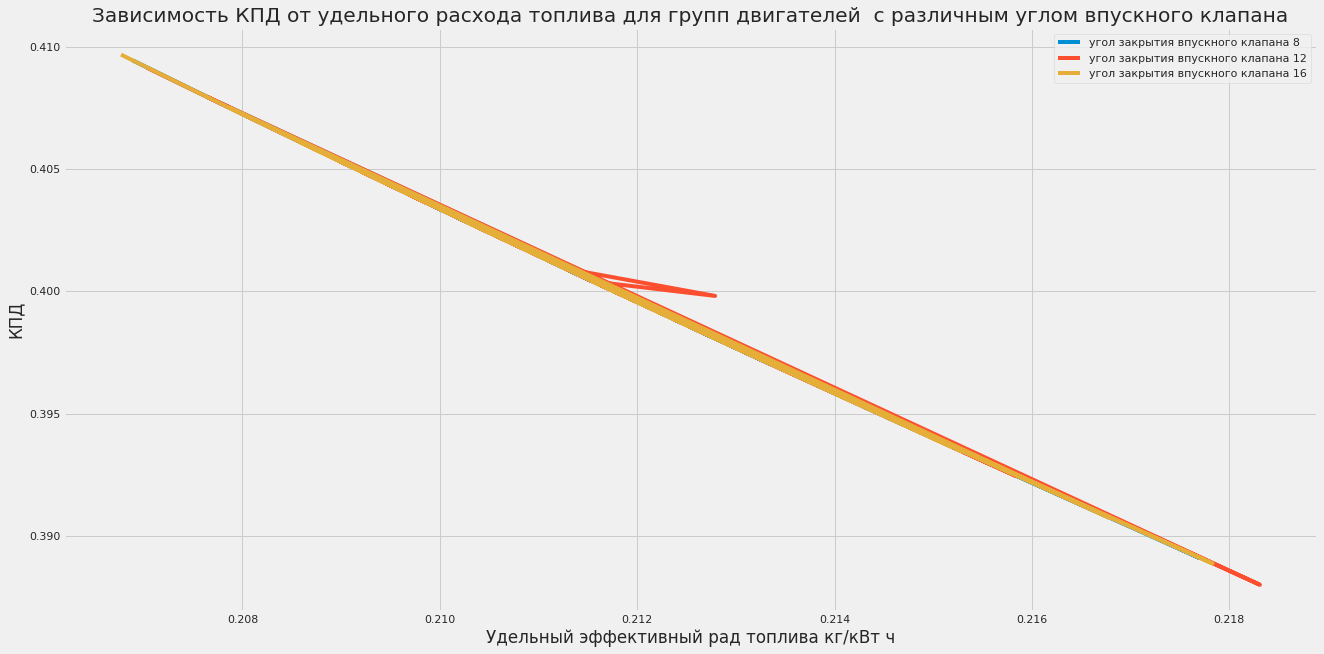

In [271]:
plt.figure(figsize=(20, 10))
plt.plot(df_x3_8["be"], df_x3_8["кпд е"], label='угол закрытия впускного клапана 8')
plt.plot(df_x3_12["be"], df_x3_12["кпд е"], label='угол закрытия впускного клапана 12')
plt.plot(df_x3_16["be"], df_x3_16["кпд е"], label='угол закрытия впускного клапана 16')
plt.title("Зависимость КПД от удельного расхода топлива для групп двигателей  с различным углом впускного клапана")
plt.xlabel("Удельный эффективный рад топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Видим, что двигатели с углом закрытия впускного клапана, равным 16, являются наиболее эффективными.

Построим график зависимости мощьности от расхода топлива для групп.

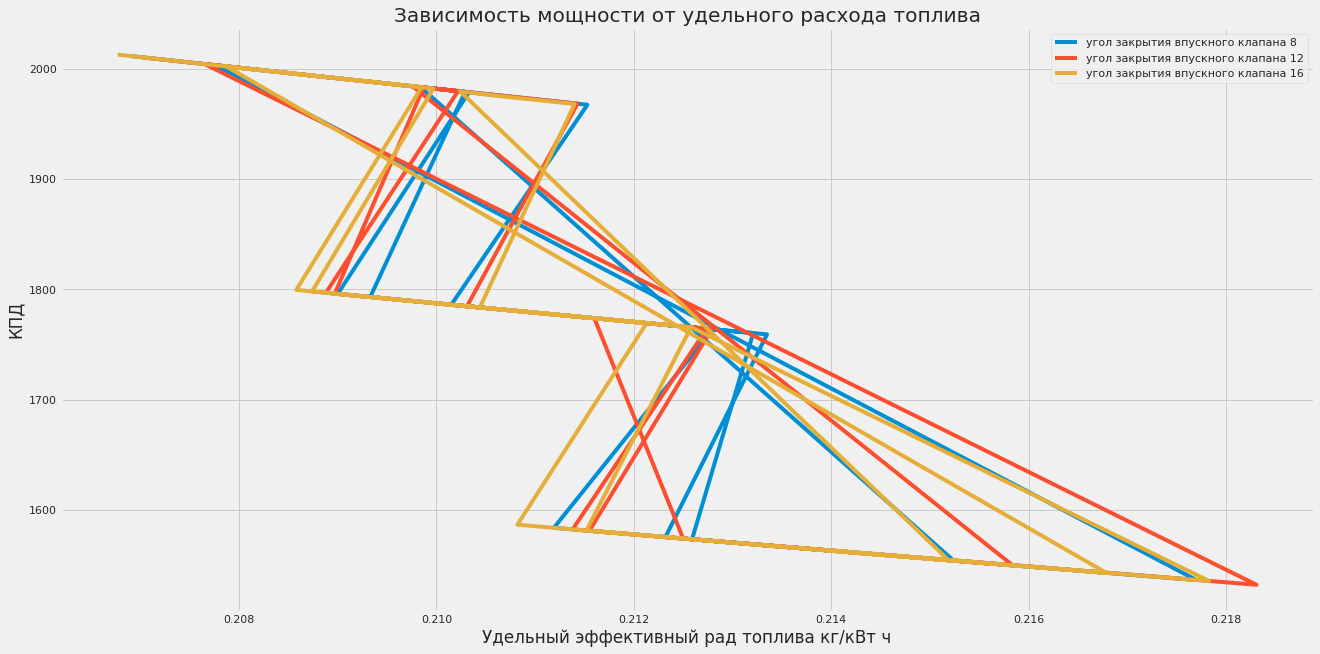

In [282]:
plt.figure(figsize=(20, 10))
plt.plot(df_x3_8["be"], df_x3_8.Ne, label='угол закрытия впускного клапана 8')
plt.plot(df_x3_12["be"], df_x3_12.Ne, label='угол закрытия впускного клапана 12')
plt.plot(df_x3_16["be"], df_x3_16.Ne, label='угол закрытия впускного клапана 16')
plt.title("Зависимость мощности от удельного расхода топлива")
plt.xlabel("Удельный эффективный рад топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Зависимость четко не прослеживается для данного параметра.

### Создадим отдельные датасеты для параметра x4 - давление наддува

Сгруппируем данные по параметру х4

In [235]:
df_all_engines.groupby("x4").first()

,Number,X1,x2,X3,Ne,Pe,gц,be,кпд е,Pi,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
x4,,,,,,,,,,,,,,,,,,,,,
0,55,0.000648,-30,8,1536.8,9.8229,0.82,0.21770,0.38909,11.807,...,0.04099,79.800,2.9346,373.33,87.557,935.51,7.4097,849.04,45,2.63
15,28,0.000648,-30,8,1554.4,9.9356,0.82,0.21524,0.39355,11.736,...,0.04744,83.000,2.6611,370.40,79.509,929.49,7.0957,888.26,45,2.39
30,1,0.000648,-30,8,1543.3,9.8644,0.82,0.21679,0.39073,11.597,...,0.05095,89.201,2.4133,372.69,72.046,934.49,6.8091,943.96,45,2.15


Возможные значения 0, 15, 30

In [275]:
# Создадим датасеты для х4 и проверим корректность их создания
df_x4_0 = df_all_engines[df_all_engines.x4 == 0]
df_x4_15 = df_all_engines[df_all_engines.x4 == 15]
df_x4_30 = df_all_engines[df_all_engines.x4 == 30]
df_x4_0.tail()

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
76,77,0.000564,-12,16,0,1784.3,11.405,0.92,0.21037,0.40264,...,0.03429,83.400,2.4403,350.42,84.742,921.39,7.8250,908.88,15,2.63
77,78,0.000479,-12,16,0,1799.6,11.503,0.92,0.20858,0.40610,...,0.02493,84.000,2.4396,349.53,84.698,918.85,7.8626,911.03,15,2.63
78,79,0.000648,-2,16,0,1983.2,12.676,1.02,0.20985,0.40366,...,0.04586,81.800,2.4435,351.13,85.009,924.97,8.2922,960.32,15,2.63
79,80,0.000564,-2,16,0,2001.1,12.791,1.02,0.20796,0.40731,...,0.03318,86.401,2.4422,350.40,84.904,922.41,8.3428,965.08,15,2.63
80,81,0.000479,-2,16,0,2012.7,12.865,1.02,0.20677,0.40967,...,0.02421,88.401,2.4410,349.67,84.812,919.90,8.3999,970.13,15,2.63


Построим зависимость КПД от расхода топлива для сформированных выше датасетов двигателей с разным давлением наддува

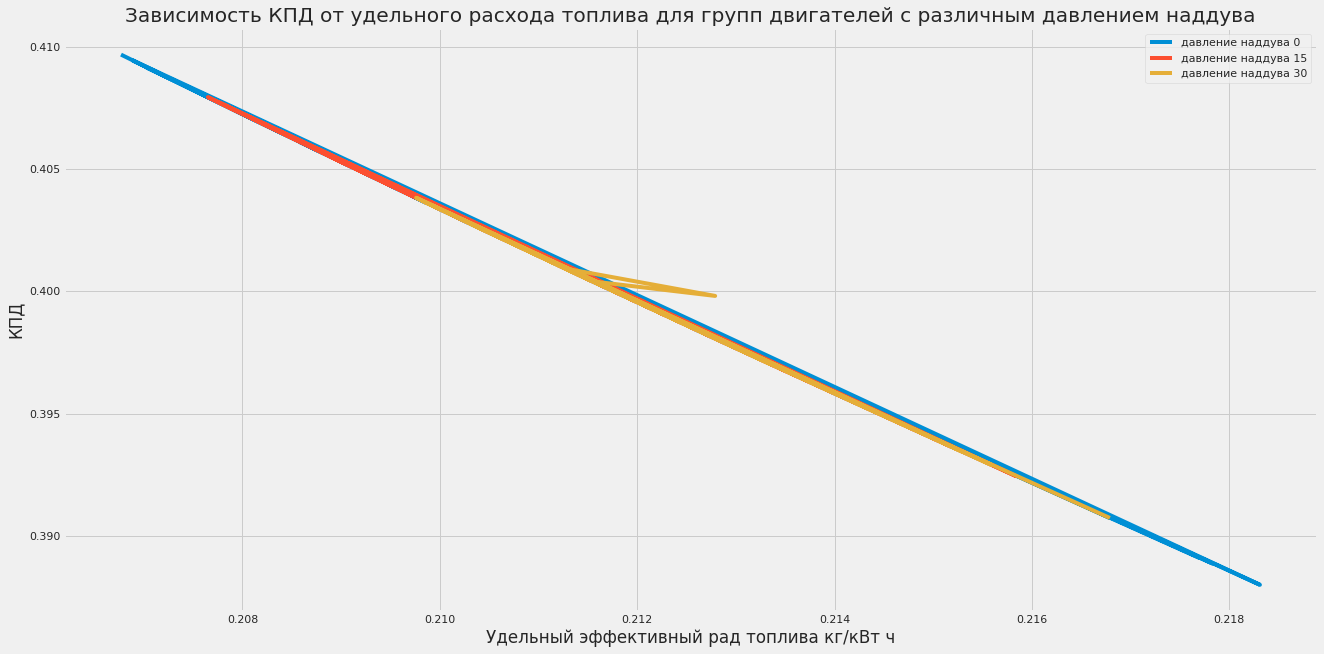

In [276]:
plt.figure(figsize=(20, 10))
plt.plot(df_x4_0["be"], df_x4_0["кпд е"], label='давление наддува 0')
plt.plot(df_x4_15["be"], df_x4_15["кпд е"], label='давление наддува 15')
plt.plot(df_x4_30["be"], df_x4_30["кпд е"], label='давление наддува 30')
plt.title("Зависимость КПД от удельного расхода топлива для групп двигателей с различным давлением наддува")
plt.xlabel("Удельный эффективный рад топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Видим, что двигатели с давлением наддува равным 0 имеют наибольший КПД и меньший расход топлива

Построим график зависимости мощьности от расхода топлива для групп двигаталей с различным давлением наддува

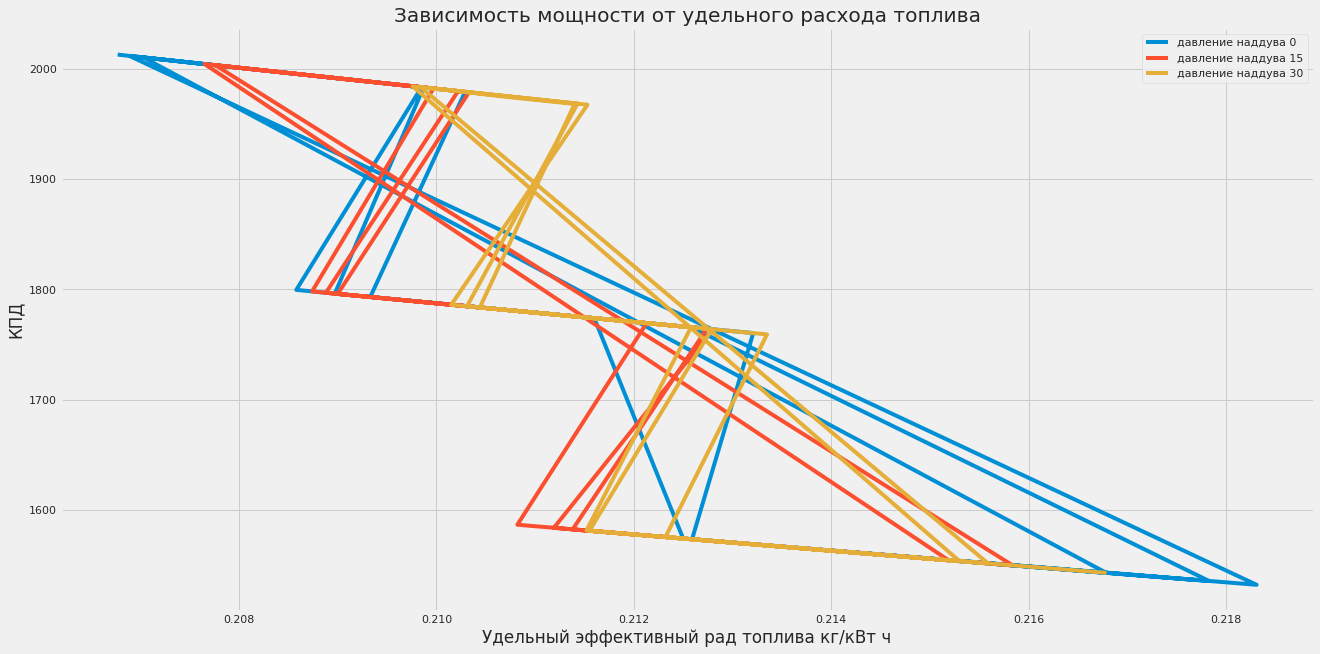

In [284]:
plt.figure(figsize=(20, 10))
plt.plot(df_x4_0["be"], df_x4_0.Ne, label='давление наддува 0')
plt.plot(df_x4_15["be"], df_x4_15.Ne, label='давление наддува 15')
plt.plot(df_x4_30["be"], df_x4_30.Ne, label='давление наддува 30')
plt.title("Зависимость мощности от удельного расхода топлива")
plt.xlabel("Удельный эффективный рад топлива кг/кВт ч")
plt.ylabel("КПД")
plt.legend()

Видим что не прослеживается четкого влияния давления наддува на зависимость мощности от удельного расхода топлива

## Выводы

Мы проанализировали 4 параметра, которые изменялись для дизельных двигателей  в различных комбинациях. Это параметры:
    
    х1 - цикловая подача топлива
    
    х2 - угол опережения подачи топлива
    
    х3 - угол закрытия впускного клапан
        
    х4 - давление наддува


В ходе анализха отдельных групп было выявлено что для х1  двигатели с любой подачей топлива могут достигать максимальной мощьности около 2кВт, но наиболее экономичны при этом двигатели с параметром 0.000479.
Для х2 лучшие паказатели имели двигатели с углом опережения подачи топлива -2.
Для х3 не было четкой зависимость мощности от удельного расхода топлива, но лучшее КПД имели то двигатели с углом закрытия впускного клапана, равным 16.
Для х4 так же не было видно четкого влияния давления наддува на зависимость мощности от удельного расхода топлива, однако в плане эфективности выигрывали двигатели со значением параметра, равным 0.

Чтобы проверить наши выводи, сделанные на отдельных датасетах найдем максимальные значения мощности

In [246]:
#df_all_engines[df_all_engines.X1 == 0.0005636]
df_all_engines.Ne.max()

2012.7

Так же найдем максимальное значение КПД

In [254]:
df_all_engines['кпд е'].max()

0.40967

Найдем строку с параметрами двигателя с максимальной мощностью:

In [255]:
df_max_Ne = df_all_engines[df_all_engines.Ne == df_all_engines.Ne.max()]
df_max_Ne

,Number,X1,x2,X3,x4,Ne,Pe,gц,be,кпд е,...,Доля ис.т,П-ть сгор,Pa,Ta,Pc,Tc,Pb,Tb,Конец вп,Pi к
80,81,0.000479,-2,16,0,2012.7,12.865,1.02,0.20677,0.40967,...,0.02421,88.401,2.441,349.67,84.812,919.9,8.3999,970.13,15,2.63


Мы видим что этот двигатель имеет и максимальный КПД найденный ранее, равный 0.40967 Очевидно нами выбран самый эффективный двигатель. Мы видим, что его параметры совпадают с предсказанными нами, т.е. х1= 0.000479, х2=-2, х3=16, х4=0. Таким образом проведенный анализ отдельных групп двигателей позволил спрогнозировать параметры которые необходимо выбрать для максимальной эффективности двигателя.